## Do the abc in R cuz python abc packages suck
https://www.datacamp.com/community/blog/jupyter-notebook-r#gs.CkjgxoE

__NB:__ `conda install -c r rpy2=2.8.6 -f`
rpy2 needs to be a specific version to work in the ipython notebook.

## Do H' and lambda pods


In [54]:
%matplotlib inline
%load_ext rpy2.ipython

import os

GIMME_DIR = "/home/isaac/gimmeSAD/"
os.chdir(GIMME_DIR)
SIMOUT_DIR = "/tmp/sims/"

import gimmeSAD
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import itertools
import random
import glob


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [2]:
## A function to return RMSE and R
def get_stats(tr, est):
    tr = np.array(tr).flatten()

    rms = sqrt(mean_squared_error(tr, est))
    r = np.corrcoef(np.vstack((tr, est)))[1,0]

    return rms, r

## Gather all the simulations into one huge simout file

In [5]:
REF_TABLE = os.path.join(SIMOUT_DIR, "priors.txt")
outfile = open(REF_TABLE, "w")

ONEPER = True
REGULARIZE = False
DROPEQUILIBSIMS = True

files = glob.glob(SIMOUT_DIR + "*/sumstats.txt")
numsims = 0
outfile.write(open(files[0]).readlines()[0])
for f in files:
    lines = open(f).readlines()[1:]
    new_lines = []
    for line in lines:
        try:
            ## DO or don't regularlize the histograms
            if REGULARIZE:
                hist = np.array([int(x) for x in line.split()[7:]])
                if np.sum(hist):
                    tot = np.sum(hist)
                    hist = hist/float(tot)
                tmp = line.split()[:7] + map(str,hist)
                line = " ".join(tmp) + "\n"
                new_lines.append(line)

            ## Do or don't drop all the extra sims at equilibrium
            if line.split()[3] == "1" and DROPEQUILIBSIMS:
                pass
            else:
                new_lines.append(line)
        except:
            pass
    lines = new_lines
    ## Only choose one step per simulation?
    if lines and ONEPER:
        lines = [random.choice(lines)]
    ## Don't write blanks
    if lines:
        numsims += len(lines)
        outfile.write("".join(lines))
        outfile.write("\n")
outfile.close()

print("Processed {} simulations.".format(numsims))

## Load the data into a pandas array
PRIOR = pd.read_csv(REF_TABLE, sep="\t")
print(PRIOR[:2])

Processed 14640 simulations.


## Walk through and perform CV for each parameter using each data configuration.

In [175]:
import rpy2.interactive as r
import rpy2.interactive.packages
r.packages.importr("abc")
abc = r.packages.packages.abc

models = ["Ma", "Mi", "Mai", "Mmi", "Mami"]
model_args = {"Ma":["shannon"],\
              "Mi":["bin_"+str(x) for x in range(0,10)],\
              "Mai":["shannon"] + ["bin_"+str(x) for x in range(0,10)],\
              "Mmi":["bin_{}_{}".format(x, y) for x in range(0,10) for y in range(0,10)],\
              "Mami":["shannon"] + ["bin_{}_{}".format(x, y) for x in range(0,10) for y in range(0,10)]}
params = ["K", "c", "%equil", "colrate", "extrate", "shannon"]

## Create the dict for holding results
results_dict = {}
for model in models:
    results_dict[model] = {}
    for param in params:
        if "a" in model and param == "shannon":
            print("Skipping H' estimation for model - {}".format(model))
            continue
        print("Doing {} {}".format(model, param))
        cvresults = abc.cv4abc(PRIOR[param], PRIOR[model_args[model]], nval=10, tols=robjects.r["c"](0.01, 0.05), method="loclinear")
        results_dict[model][param] = cvresults
        print(robjects.r["summary"](cvresults))
#cvresults = abc.cv4abc(PRIOR["%equil"], PRIOR[["shannon", "bin_0"]], nval=10, tols=.01, method="loclinear")


Doing Ma K
            P1
0.01 0.1639599
0.05 0.1762134

Doing Ma c
            P1
0.01 0.7993241
0.05 0.9337576

Doing Ma %equil
            P1
0.01 0.1385286
0.05 0.1762541

Doing Ma colrate
           P1
0.01 1.063297
0.05 1.059011

Doing Ma extrate
            P1
0.01 0.4026275
0.05 0.3259442

Skipping H' estimation for model - Ma
Doing Mi K
            P1
0.01 0.2436205
0.05 0.2716747

Doing Mi c
            P1
0.01 0.6285141
0.05 0.6048709

Doing Mi %equil
            P1
0.01 0.1360892
0.05 0.1451937

Doing Mi colrate
            P1
0.01 0.2590608
0.05 0.2396205

Doing Mi extrate
           P1
0.01 1.801701
0.05 1.745183

Doing Mi shannon
            P1
0.01 0.2831866
0.05 0.2668982

Doing Mai K
            P1
0.01 0.5398486
0.05 0.3464505

Doing Mai c
            P1
0.01 0.2840405
0.05 0.2815738

Doing Mai %equil
            P1
0.01 0.2726122
0.05 0.2568869

Doing Mai colrate
            P1
0.01 0.3147883
0.05 0.2888379

Doing Mai extrate
            P1
0.01 1.1545888
0.05 0.553

KeyError: "['bin_0_0' 'bin_0_1' 'bin_0_2' 'bin_0_3' 'bin_0_4' 'bin_0_5' 'bin_0_6'\n 'bin_0_7' 'bin_0_8' 'bin_0_9' 'bin_1_0' 'bin_1_1' 'bin_1_2' 'bin_1_3'\n 'bin_1_4' 'bin_1_5' 'bin_1_6' 'bin_1_7' 'bin_1_8' 'bin_1_9' 'bin_2_0'\n 'bin_2_1' 'bin_2_2' 'bin_2_3' 'bin_2_4' 'bin_2_5' 'bin_2_6' 'bin_2_7'\n 'bin_2_8' 'bin_2_9' 'bin_3_0' 'bin_3_1' 'bin_3_2' 'bin_3_3' 'bin_3_4'\n 'bin_3_5' 'bin_3_6' 'bin_3_7' 'bin_3_8' 'bin_3_9' 'bin_4_0' 'bin_4_1'\n 'bin_4_2' 'bin_4_3' 'bin_4_4' 'bin_4_5' 'bin_4_6' 'bin_4_7' 'bin_4_8'\n 'bin_4_9' 'bin_5_0' 'bin_5_1' 'bin_5_2' 'bin_5_3' 'bin_5_4' 'bin_5_5'\n 'bin_5_6' 'bin_5_7' 'bin_5_8' 'bin_5_9' 'bin_6_0' 'bin_6_1' 'bin_6_2'\n 'bin_6_3' 'bin_6_4' 'bin_6_5' 'bin_6_6' 'bin_6_7' 'bin_6_8' 'bin_6_9'\n 'bin_7_0' 'bin_7_1' 'bin_7_2' 'bin_7_3' 'bin_7_4' 'bin_7_5' 'bin_7_6'\n 'bin_7_7' 'bin_7_8' 'bin_7_9' 'bin_8_0' 'bin_8_1' 'bin_8_2' 'bin_8_3'\n 'bin_8_4' 'bin_8_5' 'bin_8_6' 'bin_8_7' 'bin_8_8' 'bin_8_9' 'bin_9_0'\n 'bin_9_1' 'bin_9_2' 'bin_9_3' 'bin_9_4' 'bin_9_5' 'bin_9_6' 'bin_9_7'\n 'bin_9_8' 'bin_9_9'] not in index"

rpy2.rinterface.NULL

(0.24245281088300752, 0.79138848605039203)


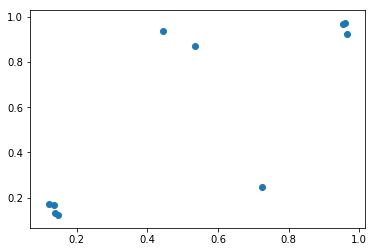

In [163]:
from rpy2 import robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()
df_true = pandas2ri.ri2py(cvresults[cvresults.names.index('true')])
df_est = pandas2ri.ri2py(cvresults[cvresults.names.index('estim')])
tru = np.array(df_true).flatten()
est = np.array(df_est).flatten()
print(get_stats(tru, est))
plt.scatter(tru, est)

# Scenario M(A) - H'

## Λ PODS

Prediction error based on a cross-validation sample of 10

             eq
0.01 0.01212911
0.05 0.01414181


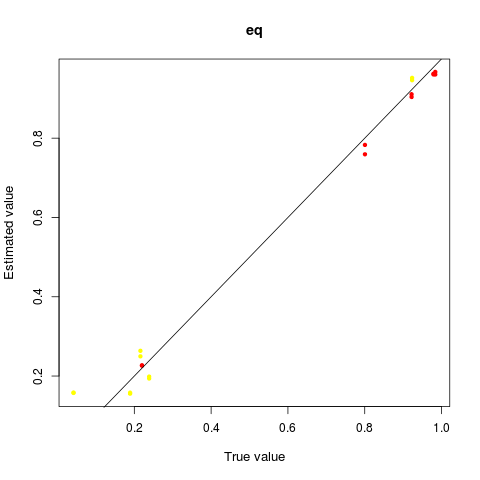

In [51]:
%%R -i models -o tr,est

cv.res.reg <- cv4abc(data.frame(eq=PRIOR[,4]), PRIOR[,7], nval=10, tols=c(.01, .05), method="loclinear")
print(summary(cv.res.reg))
plot(cv.res.reg)

## Return true and estimated values
tr <- cv.res.reg$true
est <- cv.res.reg$estim$tol0.01

In [85]:
print("RMS, R")
rms, r = get_stats(tr,est)
print(rms, str(r**2))

RMS, R
(0.35772933642857757, '0.662116863409')


Prediction error based on a cross-validation sample of 100

            eq
0.01 1.0112240
0.05 0.9659694
0.5  1.0016930


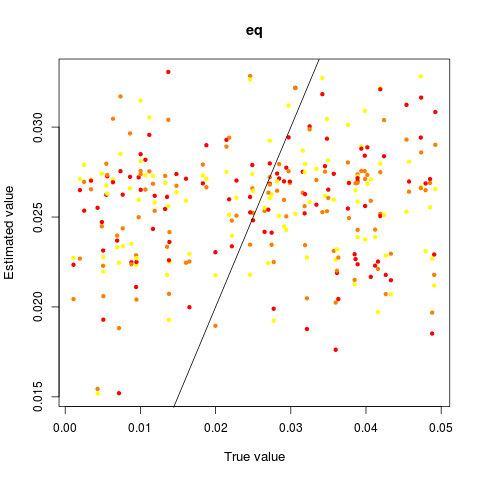

In [79]:
%%R -o tr,est
cv.res.reg <- cv4abc(data.frame(eq=PRIOR[,"colrate"]), PRIOR[,7], nval=100, tols=c(.01, .05, 0.5), method="loclinear")
print(summary(cv.res.reg))
plot(cv.res.reg)
## Return true and estimated values
tr <- cv.res.reg$true
est <- cv.res.reg$estim$tol0.01

In [81]:
print("RMS, R")
print(get_stats(tr,est))

RMS, R
(0.014266108695060117, 0.10371360948162638)
100


# Scenario M(I) - 1D SGD
## Estimate H' using 1D π vector

Prediction error based on a cross-validation sample of 100

          shan
0.01 0.3009840
0.05 0.2913916


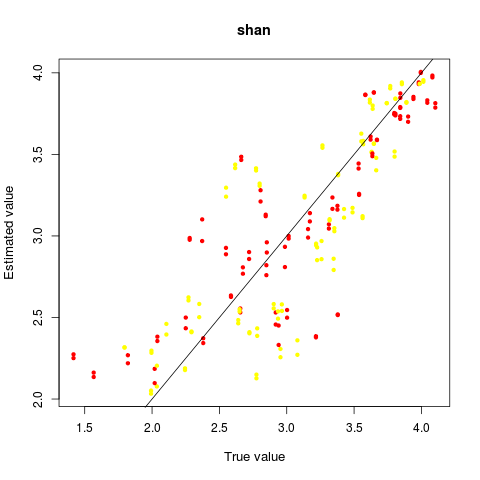

In [9]:
%%R -o tr,est
cv.res.reg <- cv4abc(data.frame(shan=PRIOR[,"shannon"]), PRIOR[,c("bin_0", "bin_1")],
                     nval=100, tols=c(.01, .05), method="loclinear", 
                     statistic="median")
print(summary(cv.res.reg))
plot(cv.res.reg)
## Return true and estimated values
tr <- cv.res.reg$true
est <- cv.res.reg$estim$tol0.05

In [84]:
print("RMS, R")
rms, r = get_stats(tr,est)
print(rms, str(r**2))

RMS, R
(0.35772933642857757, '0.662116863409')


## Estimate Λ using 1D π pi vector

Prediction error based on a cross-validation sample of 100

            eq
0.01 0.5692685
0.05 0.5233106


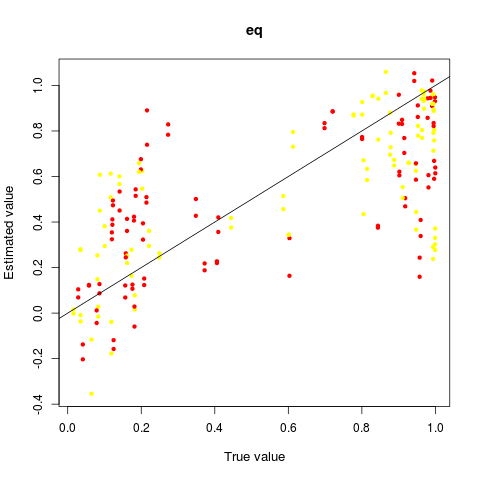

In [86]:
%%R -o tr,est
cv.res.reg <- cv4abc(data.frame(eq=PRIOR[,"X.equil"]), PRIOR[,8:17], 
                     nval=100, tols=c(.01, .05), method="loclinear", 
                     statistic="median")
print(summary(cv.res.reg))
plot(cv.res.reg)
## Return true and estimated values
tr <- cv.res.reg$true
est <- cv.res.reg$estim$tol0.05

In [87]:
print("RMS, R")
rms, r = get_stats(tr,est)
print(rms, str(r**2))

RMS, R
(0.27659035794536746, '0.503971465752')


## Estimate colonization rate from SGD

Prediction error based on a cross-validation sample of 100

            eq
0.01 0.4276709
0.05 0.2911562


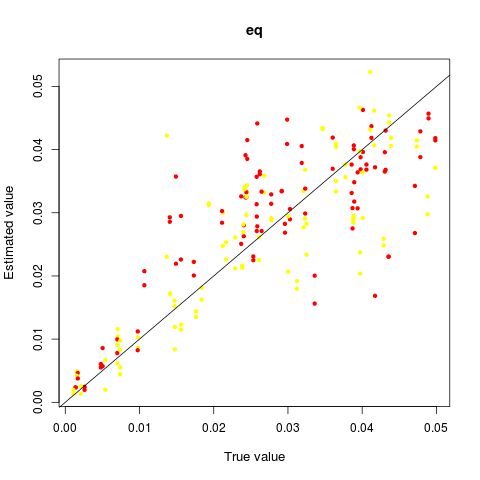

In [19]:
%%R
cv.res.reg <- cv4abc(data.frame(eq=PRIOR[,"colrate"]), PRIOR[,8:17], 
                     nval=100, tols=c(.01, .05), method="loclinear", 
                     statistic="median")
print(summary(cv.res.reg))
plot(cv.res.reg)

# Scenario M(AI) - 1D SGD & H'
## Estimate Λ using 1D π vector and Shannon's Index

Prediction error based on a cross-validation sample of 50

            eq
0.01 0.1050862
0.05 0.1169718
0.5  0.1471389


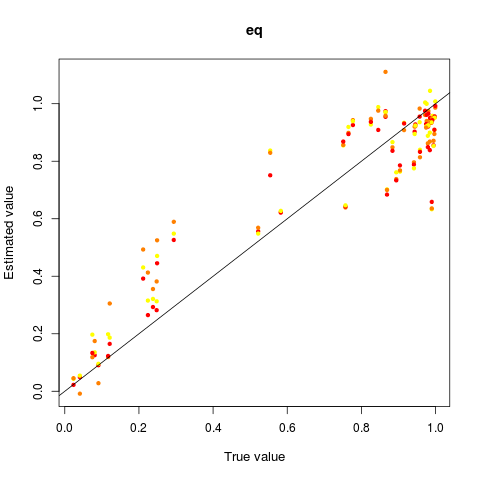

In [45]:
%%R
cv.res.reg <- cv4abc(data.frame(eq=PRIOR[,"X.equil"]), PRIOR[,7:17], 
                     nval=50, tols=c(.01, .05, 0.5), method="loclinear")
print(summary(cv.res.reg))
plot(cv.res.reg)

## Estimate colonization rate using shannon index and 1d pi vector

Prediction error based on a cross-validation sample of 20

            eq
0.01 0.1736363
0.05 0.1911525
0.5  0.2322665


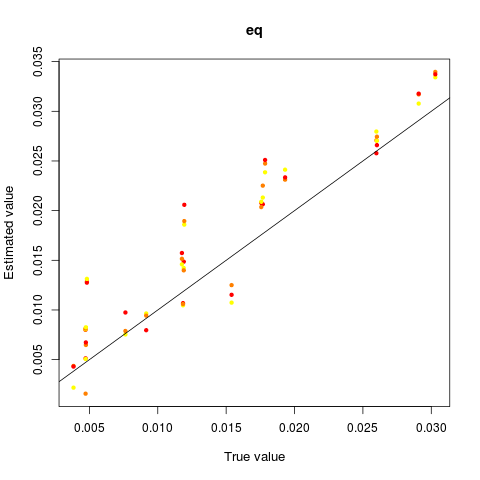

In [21]:
%%R
cv.res.reg <- cv4abc(data.frame(eq=PRIOR[,"colrate"]), PRIOR[,7:17], nval=20, tols=c(.01, .05, 0.5), method="loclinear")
print(summary(cv.res.reg))
plot(cv.res.reg)

## Estimate island size using shannon and 1d pi vector

Prediction error based on a cross-validation sample of 50

             eq
0.001 0.6453266
0.005 0.3867152
0.01  0.3609488
0.05  0.3812574
0.1   0.3750593


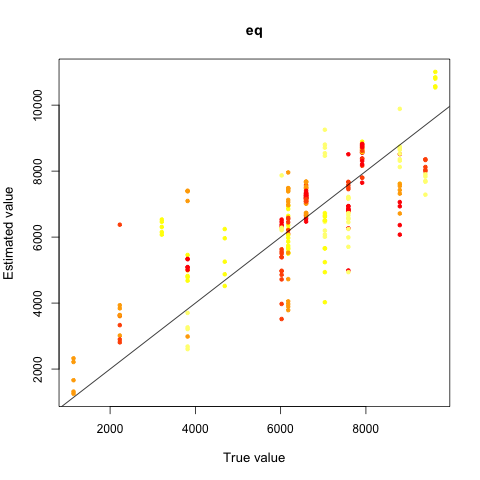

In [74]:
%%R
cv.res.reg <- cv4abc(data.frame(eq=PRIOR[,"K"]), PRIOR[,7:17], nval=50, tols=c(.001, .005, .01, .05,.1), method="loclinear")
print(summary(cv.res.reg))
plot(cv.res.reg)

# Co-estimate island size and %equil 

## Estimate island size/%equil using shannon and 1d pi vector

In [ ]:
%%R
cv.res.reg <- cv4abc(data.frame(k=PRIOR[,"K"], eq=PRIOR[,"X.equil"]), PRIOR[,7:17], nval=50, tols=c(.001, .005, .01, .05,.1), method="loclinear")
print(summary(cv.res.reg))
plot(cv.res.reg)

# Scenario M(MI) - 2D SGD

# Scenario M(AMI) - 2D SGD & H'

# Trash below here

In [50]:
%%R -o tr,est
#cv.res.reg$true
tr <- cv.res.reg$true
est <- cv.res.reg$estim$tol0.01

In [64]:
from sklearn.metrics import mean_squared_error
from math import sqrt
tr = np.array(tr).flatten()

rms = sqrt(mean_squared_error(tr, est))
print(rms)
r = np.corrcoef(np.vstack((tr, est)))[1,0]
print(r)

0.0137634379473
0.0959646255565


### Neuralnet (slow)

12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
12345678910
Prediction error based on a cross-valida

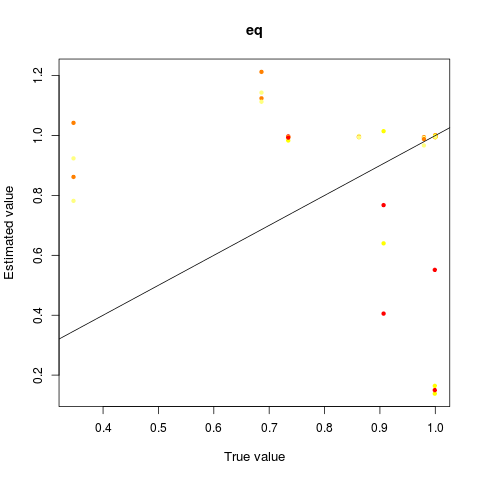

In [23]:
%%R
## This is slow even on toy data
cv.res.net <- cv4abc(data.frame(eq=PRIOR[,"X.equil"]), PRIOR[,7:17], nval=10, tols=c(.01, .05,.1, 0.5), method="neuralnet")
print(summary(cv.res.net))
plot(cv.res.net)

In [27]:
dat = open("new_sims/priors.txt").readlines()
outfile = open("new_sims/newpriors.txt", 'w')
outfile.write(dat[0])
count = 0
for line in dat[1:]:
    try:
        if len(line) ==1:
                count += 1
        elif not line.strip().split()[3] == "1":
                outfile.write(line)
    except:
        pass
print("how many blanks {}".format(count))

how many blanks 508


In [62]:
import math
def shannon(abundances):
    ## Unpack the abundance dist
    abunds = [v for v in abundances.values()]
    tot = np.sum(abunds)
    return -1 * np.sum([x/float(tot) * math.log(x/float(tot)) for x in abunds  if x > 0])

In [78]:
#8   25  7   4   1   3   2   4   1   2
wat = {1:8, 2:25, 3:7, 5:4, 6:1, 7:3, 8:2, 9:4, 10:1, 11:2}
shannon(wat)

[8, 25, 7, 4, 1, 3, 2, 4, 1, 2]
57


1.7994095226462321

In [30]:
%%R
summary(cv.res.net)
cv.res.net + cv.res.net

Prediction error based on a cross-validation sample of 10
Error in cv.res.net + cv.res.net : 
  non-numeric argument to binary operator


/home/isaac/miniconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in cv.res.net + cv.res.net : 
  non-numeric argument to binary operator

  warnings.warn(x, RRuntimeWarning)
